# Craft a Story from a Dataset

Dataset: Orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts

Source: Datalab

Purpose: Understand customer behavior to drive additional revenue

Audience: Non-technical

### Import Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [175]:
orders = pd.read_csv('./Ecommerce Orders.csv')
variable_explanation = pd.read_csv('./Variable Explanation.csv')

### Examine Data

In [176]:
orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,0012-01-10T08:26:00.000Z,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,0012-01-10T08:26:00.000Z,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,0012-01-10T08:26:00.000Z,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,0012-01-10T08:26:00.000Z,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,0012-01-10T08:26:00.000Z,3.39,17850,United Kingdom


In [177]:
pd.set_option('display.max_colwidth', None)
variable_explanation

,Variable,Explanation
0,InvoiceNo,A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation.
1,StockCode,A 5-digit integral number uniquely assigned to each distinct product.
2,Description,Product (item) name
3,Quantity,The quantities of each product (item) per transaction
4,InvoiceDate,The day and time when each transaction was generated
5,UnitPrice,Product price per unit in sterling (pound)
6,CustomerID,A 5-digit integral number uniquely assigned to each customer
7,Country,The name of the country where each customer resides


In [178]:
orders.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

No missing values

In [179]:
orders.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [180]:
orders['InvoiceDate'].unique()

array(['0012-01-10T08:26:00.000Z', '0012-01-10T08:28:00.000Z',
       '0012-01-10T08:34:00.000Z', '0012-01-10T08:35:00.000Z',
       '0012-01-10T08:45:00.000Z', '0012-01-10T09:00:00.000Z',
       '0012-01-10T09:01:00.000Z', '0012-01-10T09:02:00.000Z',
       '0012-01-10T09:09:00.000Z', '0012-01-10T09:32:00.000Z',
       '0012-01-10T09:34:00.000Z', '0012-01-10T09:37:00.000Z'],
      dtype=object)

Data seems to only show one date even though description mentions data was collected over 1 yr; entries may have had a software error

**How many invoices are there?**

In [181]:
orders['InvoiceNo'].nunique()

14

**What revenue was generated?**

In [182]:
print(f"${(orders['Quantity'] * orders['UnitPrice']).sum():.2f}")

$3122.93


**What are the most popular items by # of orders? By quantity?**

In [183]:
orders_by_item = orders.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending = False).head(10)
orders_by_item.name = 'NumOrders'

In [184]:
quantities_by_item = orders.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
quantities_by_item.name = 'Quantity'

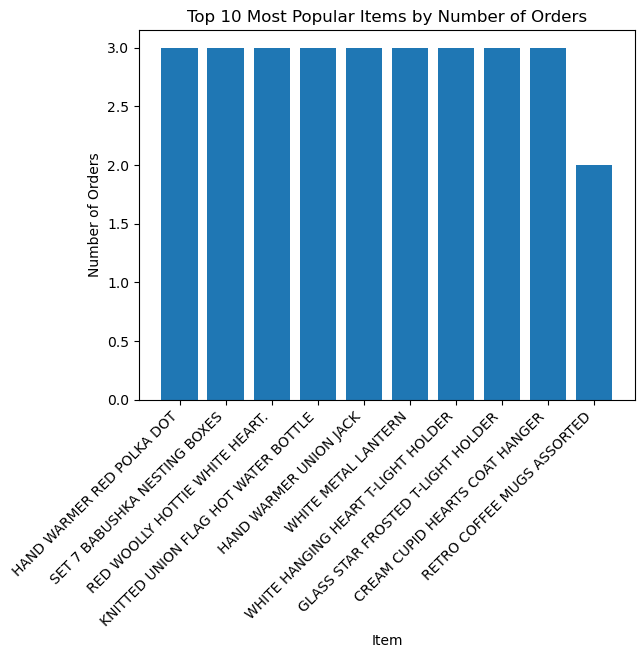

In [185]:
plt.bar(orders_by_item.index, orders_by_item.values)
plt.title('Top 10 Most Popular Items by Number of Orders')
plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

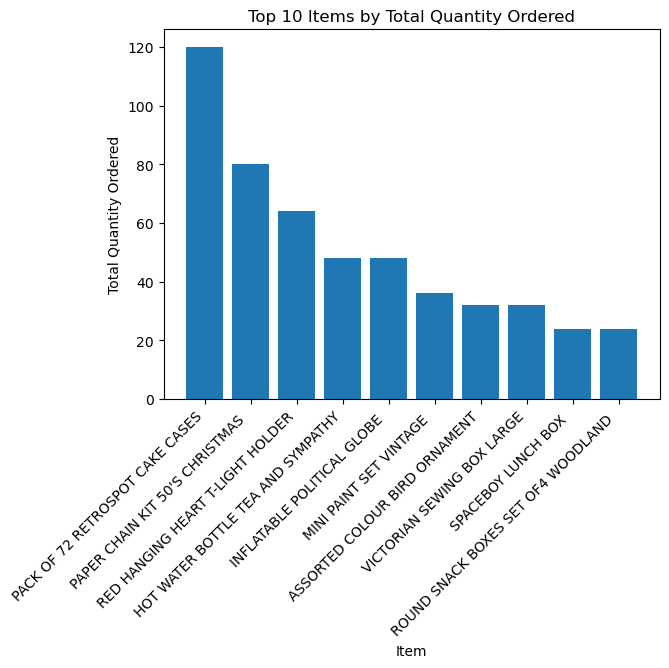

In [186]:
plt.bar(quantities_by_item.index, quantities_by_item.values)
plt.title('Top 10 Items by Total Quantity Ordered')
plt.xlabel('Item')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')

plt.show()

**For the items with the most quantity ordered, how many orders do they correspond to?**

In [187]:
orders[orders['Description'].isin(quantities_by_item.index)].shape[0]

10

**Which customer(s) buy the most?**

In [188]:
# Number of orders per customer
orders_by_customer = orders.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).to_frame()
orders_by_customer.columns = ['NumOrders']

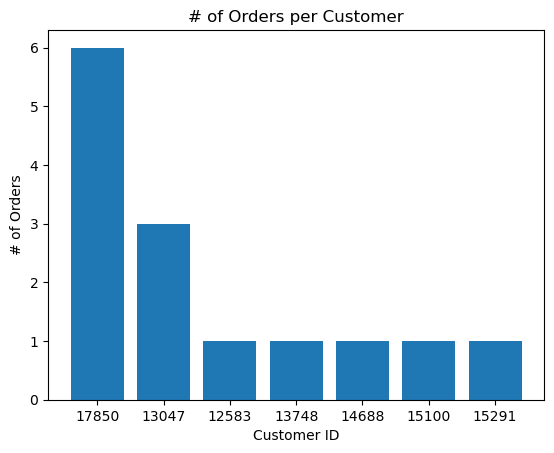

In [189]:
plt.bar(orders_by_customer.index.astype(str), orders_by_customer['NumOrders'])
plt.title('# of Orders per Customer')
plt.xlabel('Customer ID')
plt.ylabel('# of Orders')
plt.show()

In [190]:
# Total quantity purchased by each customer
quantities_by_customer = orders.groupby('CustomerID')['Quantity'].sum().to_frame()
quantities_by_customer.columns = ['Quantity']

# Rearrange index to compare between graphs more easily
quantities_by_customer = quantities_by_customer.reindex(orders_by_customer.index)

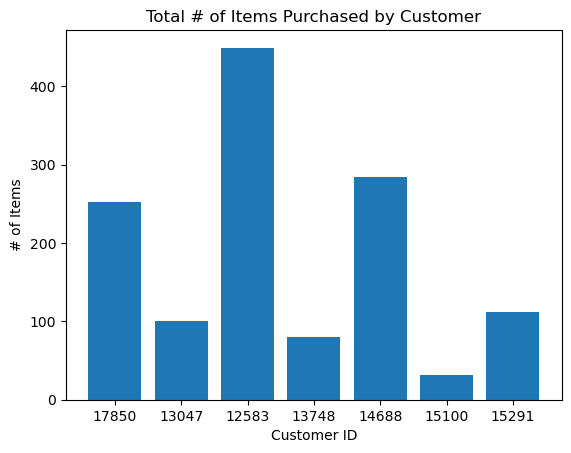

In [191]:
plt.bar(quantities_by_customer.index.astype(str), quantities_by_customer['Quantity'])
plt.title('Total # of Items Purchased by Customer')
plt.xlabel('Customer ID')
plt.ylabel('# of Items')
plt.show()

**How many unique items are purchased per customer?**

In [192]:
uniqueitems_per_customer = orders.groupby('CustomerID')['Description'].nunique().to_frame()
uniqueitems_per_customer.columns = ['NumUnique']

uniqueitems_per_customer = uniqueitems_per_customer.reindex(orders_by_customer.index)

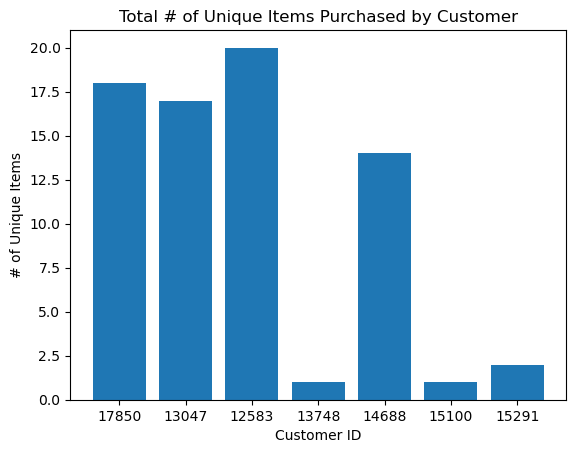

In [193]:
plt.bar(uniqueitems_per_customer.index.astype(str), uniqueitems_per_customer['NumUnique'])
plt.title('Total # of Unique Items Purchased by Customer')
plt.xlabel('Customer ID')
plt.ylabel('# of Unique Items')
plt.show()

### Form Hypothesis

If the retailer has high consumer confidence, the # of orders and # of items purchased by customer have little to no correlation, and the # of items purchased by customer is correlated to the # of item types

In [194]:
correlation = np.corrcoef(orders_by_customer['NumOrders'],quantities_by_customer['Quantity'])[0,1]

print(f"Correlation: {correlation: .2f}")

Correlation:  0.09


In [195]:
correlation = np.corrcoef(quantities_by_customer['Quantity'], uniqueitems_per_customer['NumUnique'])[0,1]

print(f"Correlation: {correlation: .2f}")

Correlation:  0.76
